In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dill
import os

In [ ]:
time_data = []
for i in range(1,8):
    directory = './day' + str(i) + '/'
    for filename in os.listdir(directory):
        share, no_share, number, routes = dill.load(open(directory+ filename, 'rb'))
        if number > 1:
            time_data += [[time, (no_share-share) / number] for type_, time, position, Id in routes if type_ =='i']
            

dill.dump(time_data, open('time_score.pkd', 'wb'))

In [2]:
time_data = dill.load(open('time_score.pkd', 'rb'))
time_df = pd.DataFrame(time_data, columns=['time', 'score'])
time_df['day'] = time_df['time'].dt.day

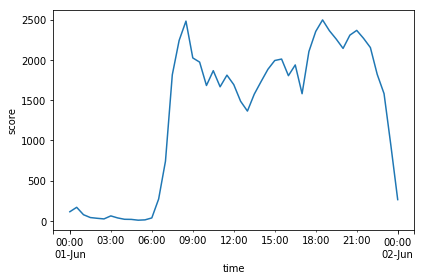

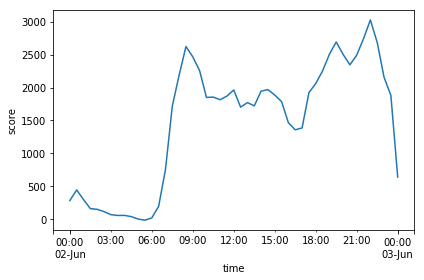

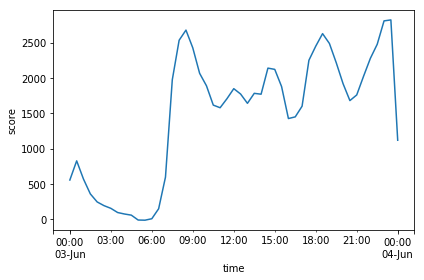

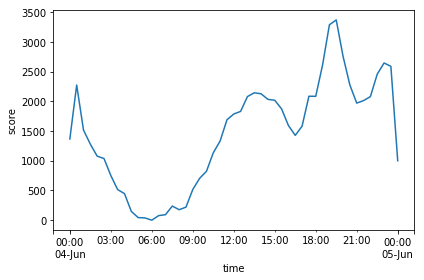

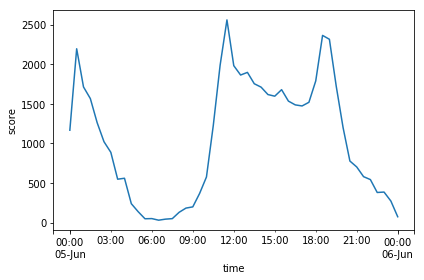

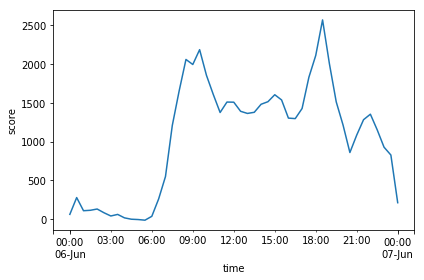

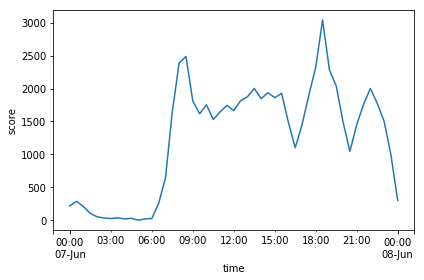

In [28]:
for name, group in time_df.groupby('day'):
    fig, ax = plt.subplots()
    group.groupby(group['time'].dt.round('30min'))['score'].agg('sum').plot(ax=ax)
    plt.xlabel('time')
    plt.ylabel('score')
    plt.tight_layout()
    plt.savefig('day' + str(name) + '_time_plot')
    

<Figure size 432x288 with 0 Axes>

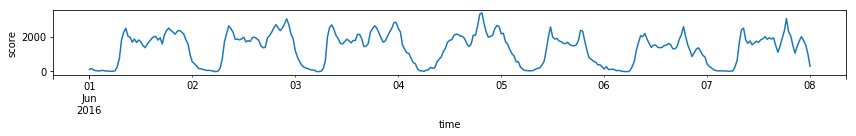

In [29]:
plt.figure()
fig, ax = plt.subplots(figsize=(12, 2))
time_df.groupby(time_df['time'].dt.round('30min'))['score'].agg('sum').plot(ax=ax)
plt.xlabel('time')
plt.ylabel('score')
plt.tight_layout()
plt.savefig('time_dependency_plot')
plt.show()